In [2]:
# ============================================================
# 004 - Modelagem Preditiva
# Projeto: Internet Digital Inclusion
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Carregar dados
# ------------------------------------------------------------

df = pd.read_csv("../data/internet_adoption.csv")

# Apenas colunas numéricas
df_num = df.select_dtypes(include=['float64', 'int64']).copy()

# Remover linhas totalmente vazias
df_num = df_num.dropna(how="all")

print("Shape numérico:", df_num.shape)
df_num.head()


Shape numérico: (6350, 25)


,Population,Internet_Penetration (%),Broadband_Speed (Mbps),Mobile_Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Attainment_Index (%),Mobile_Data_Usage (GB per User),Digital_Investment (M USD),Digital_Literacy_Score (%),Sentiment_Score (Social Media),...,Device_Penetration (%),Cybersecurity_Incidents (Count),E_Commerce_Penetration (%),Government_Digital_Policy_Index (%),Network_Latency (ms),Cloud_Service_Adoption (%),IoT_Device_Density (per 1000 people),AI_Adoption_Index (%),Data_Privacy_Regulation_Strength (%),Energy_Consumption_for_Connectivity (kWh)
0,25258314,37.436774,46.839032,8.533871,5327.303548,45.489677,2.167742,164.128065,46.458710,-0.019032,...,68.104839,4174,33.408387,37.136774,77.050645,27.834194,22.950645,15.652581,27.985161,248.871935
1,25258314,37.484286,47.227500,8.687500,5331.729286,45.555714,2.185357,165.386071,46.449286,0.084643,...,68.122500,3753,33.520000,37.128214,77.045000,27.856429,22.936429,15.681429,27.989643,248.757500
2,25258314,37.629677,47.436129,8.852903,5342.169032,45.608710,2.182581,166.200645,46.508710,0.061290,...,68.108065,4148,33.545806,37.155806,77.120968,27.870968,23.034839,15.686452,27.993548,248.524839
3,25258314,37.257667,47.500000,9.058333,5354.909667,45.643333,2.199000,166.618667,46.511667,-0.058333,...,68.147000,4032,33.579333,37.120000,77.255333,27.880333,23.083667,15.706667,28.010000,248.497333
4,25258314,37.492258,47.659677,8.886452,5360.973226,45.662258,2.205484,167.409032,46.556129,0.034839,...,68.143548,4195,33.598710,37.155484,77.075161,27.930323,23.111290,15.729355,28.018065,248.983548


In [3]:
# ------------------------------------------------------------
# 2. Remover colunas com pouquíssimas informações
# (menos de 30% preenchido)
# ------------------------------------------------------------

limite = int(df_num.shape[0] * 0.3)
df_num = df_num.dropna(axis=1, thresh=limite)

print("Colunas restantes:", df_num.shape[1])
df_num.head()


Colunas restantes: 25


,Population,Internet_Penetration (%),Broadband_Speed (Mbps),Mobile_Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Attainment_Index (%),Mobile_Data_Usage (GB per User),Digital_Investment (M USD),Digital_Literacy_Score (%),Sentiment_Score (Social Media),...,Device_Penetration (%),Cybersecurity_Incidents (Count),E_Commerce_Penetration (%),Government_Digital_Policy_Index (%),Network_Latency (ms),Cloud_Service_Adoption (%),IoT_Device_Density (per 1000 people),AI_Adoption_Index (%),Data_Privacy_Regulation_Strength (%),Energy_Consumption_for_Connectivity (kWh)
0,25258314,37.436774,46.839032,8.533871,5327.303548,45.489677,2.167742,164.128065,46.458710,-0.019032,...,68.104839,4174,33.408387,37.136774,77.050645,27.834194,22.950645,15.652581,27.985161,248.871935
1,25258314,37.484286,47.227500,8.687500,5331.729286,45.555714,2.185357,165.386071,46.449286,0.084643,...,68.122500,3753,33.520000,37.128214,77.045000,27.856429,22.936429,15.681429,27.989643,248.757500
2,25258314,37.629677,47.436129,8.852903,5342.169032,45.608710,2.182581,166.200645,46.508710,0.061290,...,68.108065,4148,33.545806,37.155806,77.120968,27.870968,23.034839,15.686452,27.993548,248.524839
3,25258314,37.257667,47.500000,9.058333,5354.909667,45.643333,2.199000,166.618667,46.511667,-0.058333,...,68.147000,4032,33.579333,37.120000,77.255333,27.880333,23.083667,15.706667,28.010000,248.497333
4,25258314,37.492258,47.659677,8.886452,5360.973226,45.662258,2.205484,167.409032,46.556129,0.034839,...,68.143548,4195,33.598710,37.155484,77.075161,27.930323,23.111290,15.729355,28.018065,248.983548


In [4]:
# ------------------------------------------------------------
# 3. Definir variável-alvo
# ------------------------------------------------------------

TARGET = "Internet_Penetration (%)"

if TARGET not in df_num.columns:
    raise Exception(f"A coluna {TARGET} não existe no dataframe numérico!")

# Remover linhas onde o target é nulo
df_num = df_num.dropna(subset=[TARGET])

# Features
X = df_num.drop(columns=[TARGET])
y = df_num[TARGET]

print("X:", X.shape, "| y:", y.shape)


X: (6350, 24) | y: (6350,)


In [5]:
# ------------------------------------------------------------
# 4. Preencher valores faltantes com mediana
# ------------------------------------------------------------

X = X.fillna(X.median(numeric_only=True))


In [6]:
# ------------------------------------------------------------
# 5. Train-Test Split
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Treino: (4762, 24) | Teste: (1588, 24)


In [7]:
# ------------------------------------------------------------
# 6. Escalonamento
# ------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# ------------------------------------------------------------
# 7. Treinar modelos
# ------------------------------------------------------------

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R²": r2_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R²
Linear Regression,6.413898,7.823356,0.686665
Ridge Regression,6.414510,7.822576,0.686728
Lasso Regression,6.424281,7.819416,0.686981


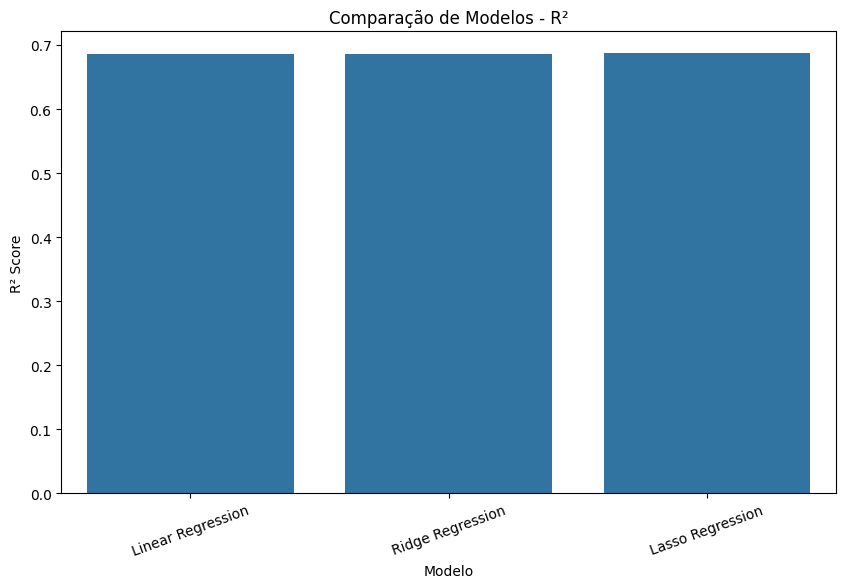

In [9]:
# ------------------------------------------------------------
# 8. Visualizar desempenho
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index(), x="index", y="R²")
plt.title("Comparação de Modelos - R²")
plt.ylabel("R² Score")
plt.xlabel("Modelo")
plt.xticks(rotation=20)
plt.show()

In [10]:
# ------------------------------------------------------------
# 9. Importância dos recursos (Linear Regression)
# ------------------------------------------------------------

best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)

coefs = pd.DataFrame({
    "feature": X.columns,
    "coef": best_model.coef_
}).sort_values(by="coef", ascending=False)

coefs.head(15)

,feature,coef
18,Network_Latency (ms),7.582763
1,Broadband_Speed (Mbps),7.409089
2,Mobile_Broadband_Speed (Mbps),7.154784
7,Digital_Literacy_Score (%),6.127264
16,E_Commerce_Penetration (%),5.151119
5,Mobile_Data_Usage (GB per User),3.759418
6,Digital_Investment (M USD),2.408042
3,GDP_Per_Capita (USD),2.323278
4,Education_Attainment_Index (%),2.095442
8,Sentiment_Score (Social Media),1.454117


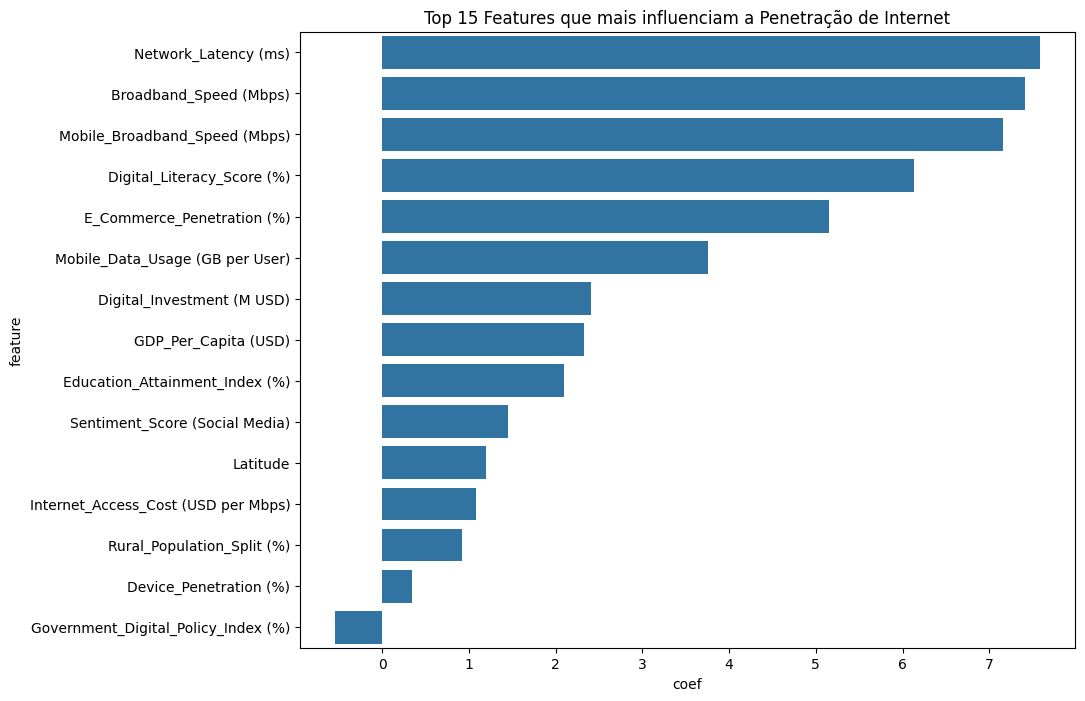

In [11]:
# ------------------------------------------------------------
# 10. Plot Importância
# ------------------------------------------------------------

plt.figure(figsize=(10, 8))
sns.barplot(data=coefs.head(15), x="coef", y="feature")
plt.title("Top 15 Features que mais influenciam a Penetração de Internet")
plt.show()